# Import Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [2]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


# Load Data

In [3]:
df = pd.read_csv("/Users/prantarborah/Downloads/dataset.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Data Cleaning, Information & Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [6]:
df.shape

(4424, 35)

In [7]:
df.size

154840

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nacionality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Father's qualification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


In [9]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [10]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])


In [11]:
df['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

/var/folders/9c/vf9yy0kx1wqfcn4frtpw6jhh0000gn/T/ipykernel_1397/4183652649.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Target'], color = "Blue")


<Axes: xlabel='Target', ylabel='Density'>

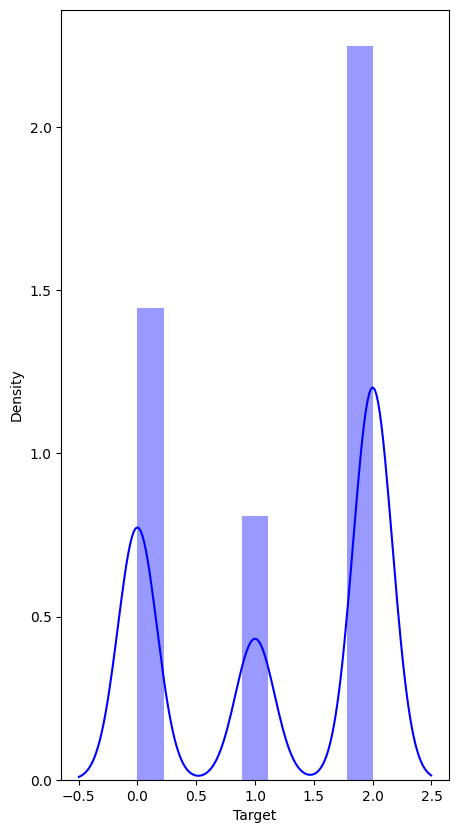

In [12]:
plt.figure(figsize=(5, 10))
sns.distplot(df['Target'], color = "Blue")

Text(0.5, 1.0, 'Target')

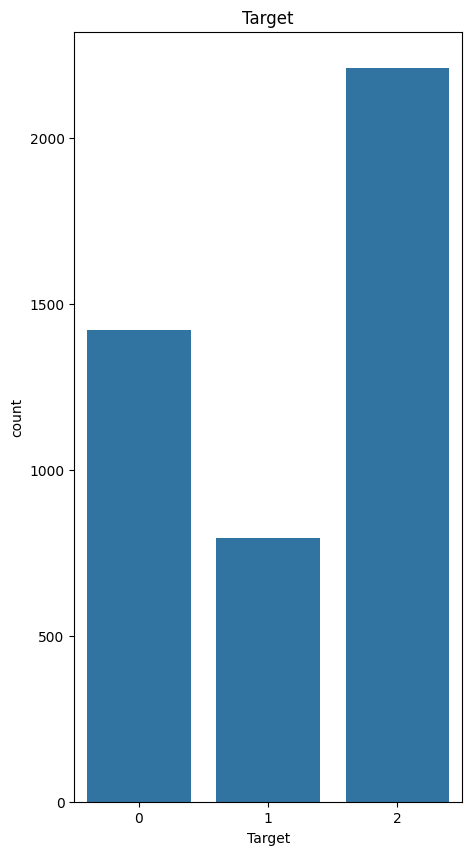

In [13]:
plt.figure(figsize=(5, 10))
sns.countplot(data = df, x="Target").set_title('Target')

In [14]:
new_data = df.copy()
new_data = new_data.drop(columns=['Nacionality', 
                                  'Mother\'s qualification', 
                                  'Father\'s qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)

In [15]:
data_corr_descending = new_data.corr()['Target'].sort_values(ascending=False)
data_corr_descending = pd.DataFrame(data_corr_descending)

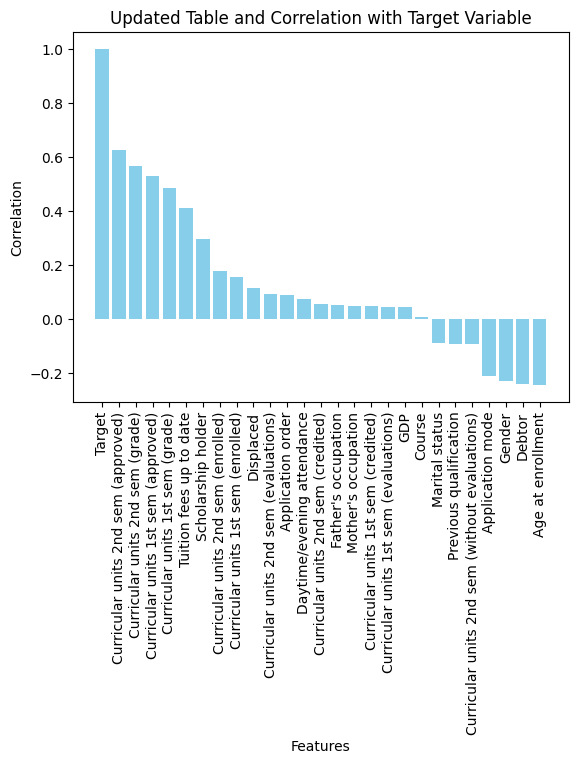

In [16]:
plt.bar(data_corr_descending.index, data_corr_descending['Target'], color='skyblue')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Updated Table and Correlation with Target Variable')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

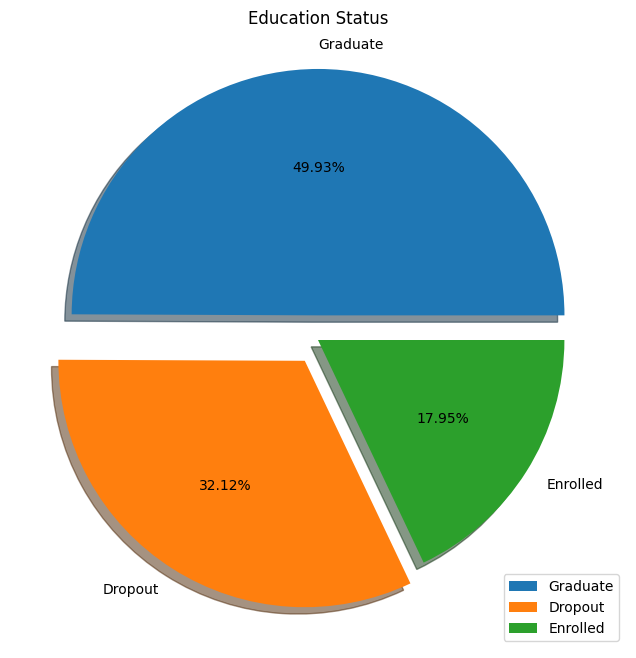

In [17]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(df['Target'].value_counts(), labels = ['Graduate', 'Dropout', 'Enrolled'], explode = (0.1, 0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

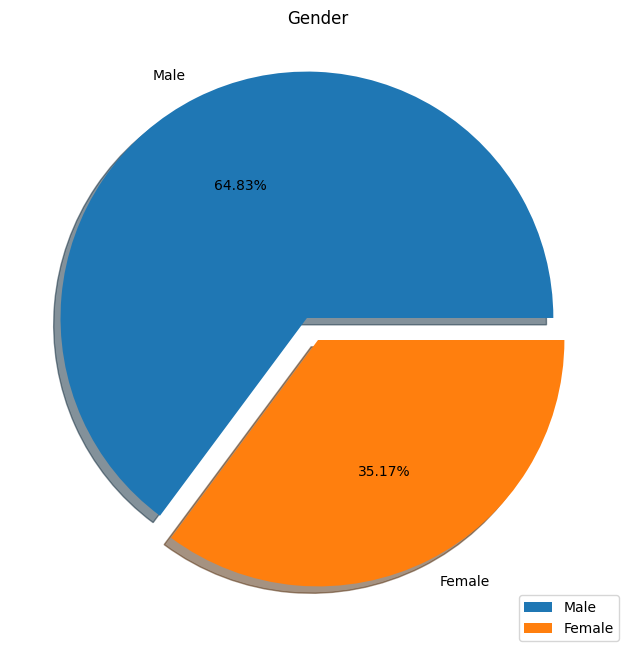

In [18]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(df['Gender'].value_counts(), labels = ['Male', 'Female'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

In [19]:
demo_data = df[["Marital status", "Nacionality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# Socio-economic data
se_data = df[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# Macro-economic Enrollment Data
me_data = df[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# Academic data
academic_data = df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

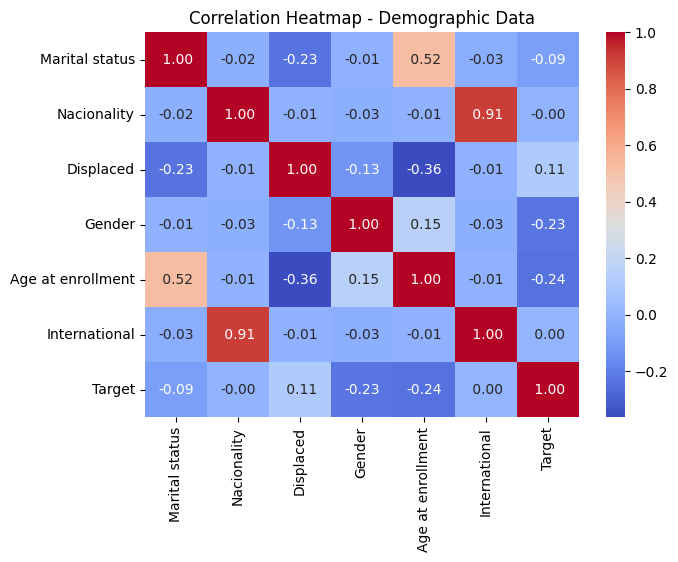

In [20]:

plt.figure(figsize=(7,5))
sns.heatmap(demo_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Heatmap - Demographic Data')
plt.show()

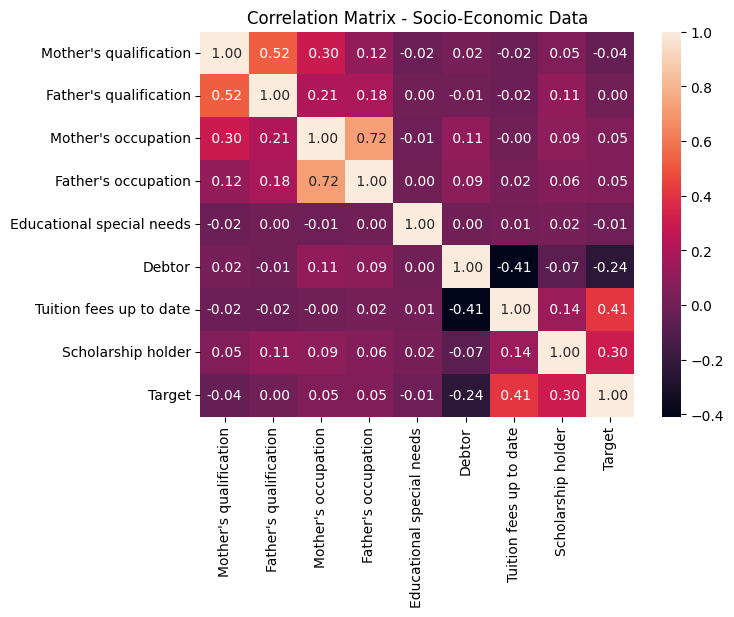

In [21]:
# Correlation Matrix for socio-economic data
plt.figure(figsize=(7,5))
sns.heatmap(se_data.corr(), annot=True, fmt=' .2f')
plt.title('Correlation Matrix - Socio-Economic Data')
plt.show()

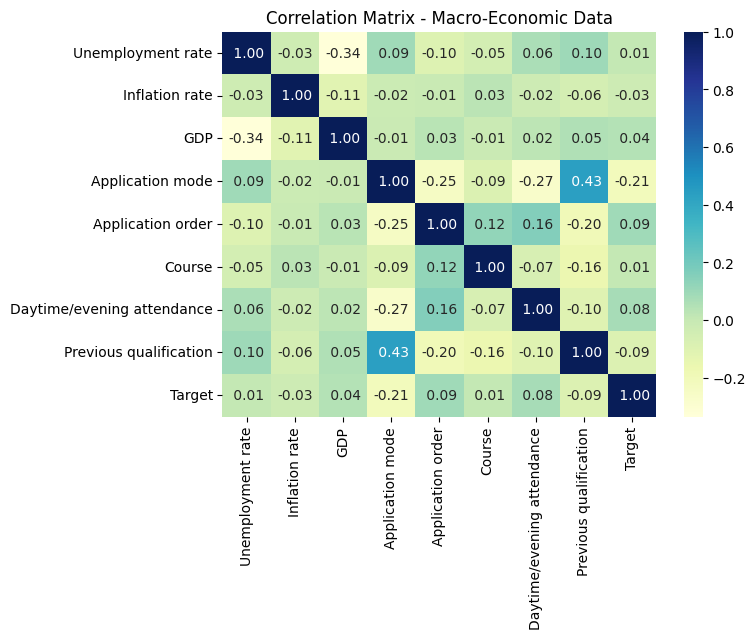

In [22]:
# Correlation Matrix for Macro-Economic Data
plt.figure(figsize=(7,5))
sns.heatmap(me_data.corr(), annot=True, cmap='YlGnBu', fmt=' .2f')
plt.title('Correlation Matrix - Macro-Economic Data')
plt.show()


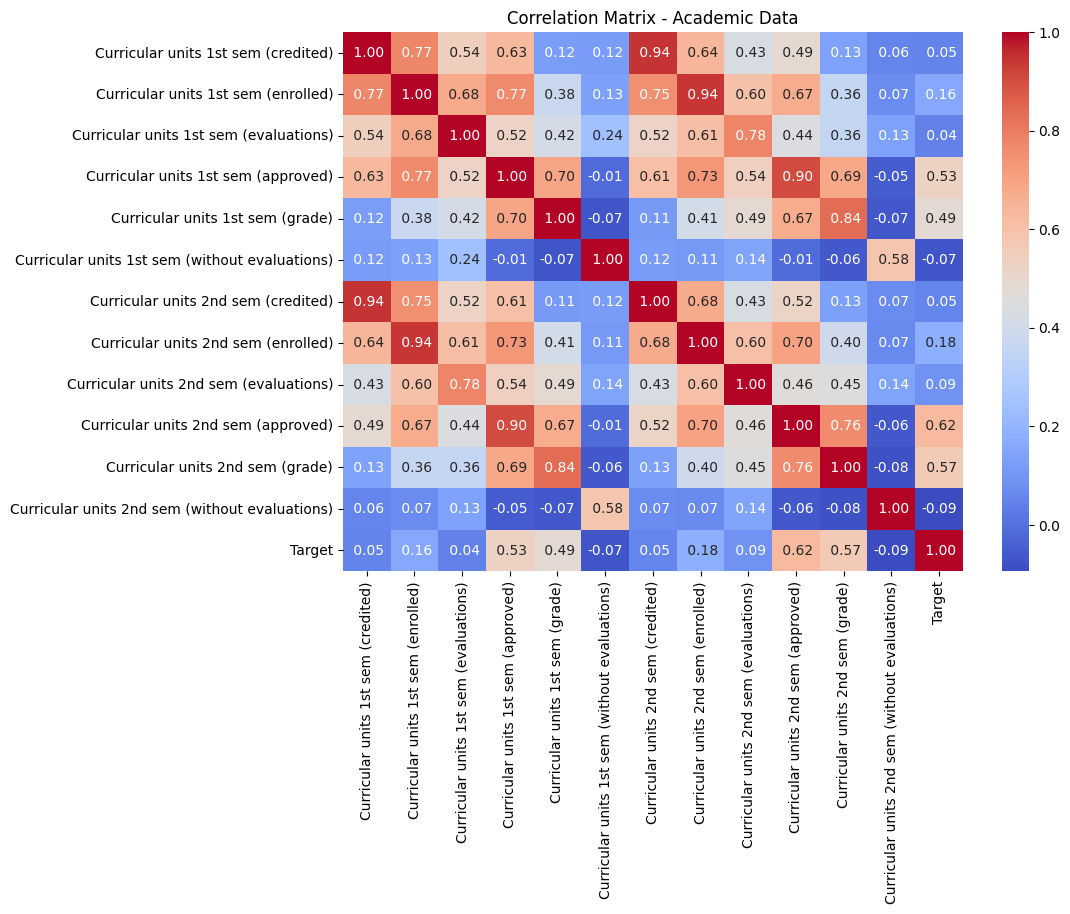

In [23]:
# Correlation Matrix for Academic Data
plt.figure(figsize=(10,7))
sns.heatmap(academic_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Matrix - Academic Data')
plt.show()

/var/folders/9c/vf9yy0kx1wqfcn4frtpw6jhh0000gn/T/ipykernel_1397/3898062606.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, i], color='blue')
/var/folders/9c/vf9yy0kx1wqfcn4frtpw6jhh0000gn/T/ipykernel_1397/3898062606.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, i]

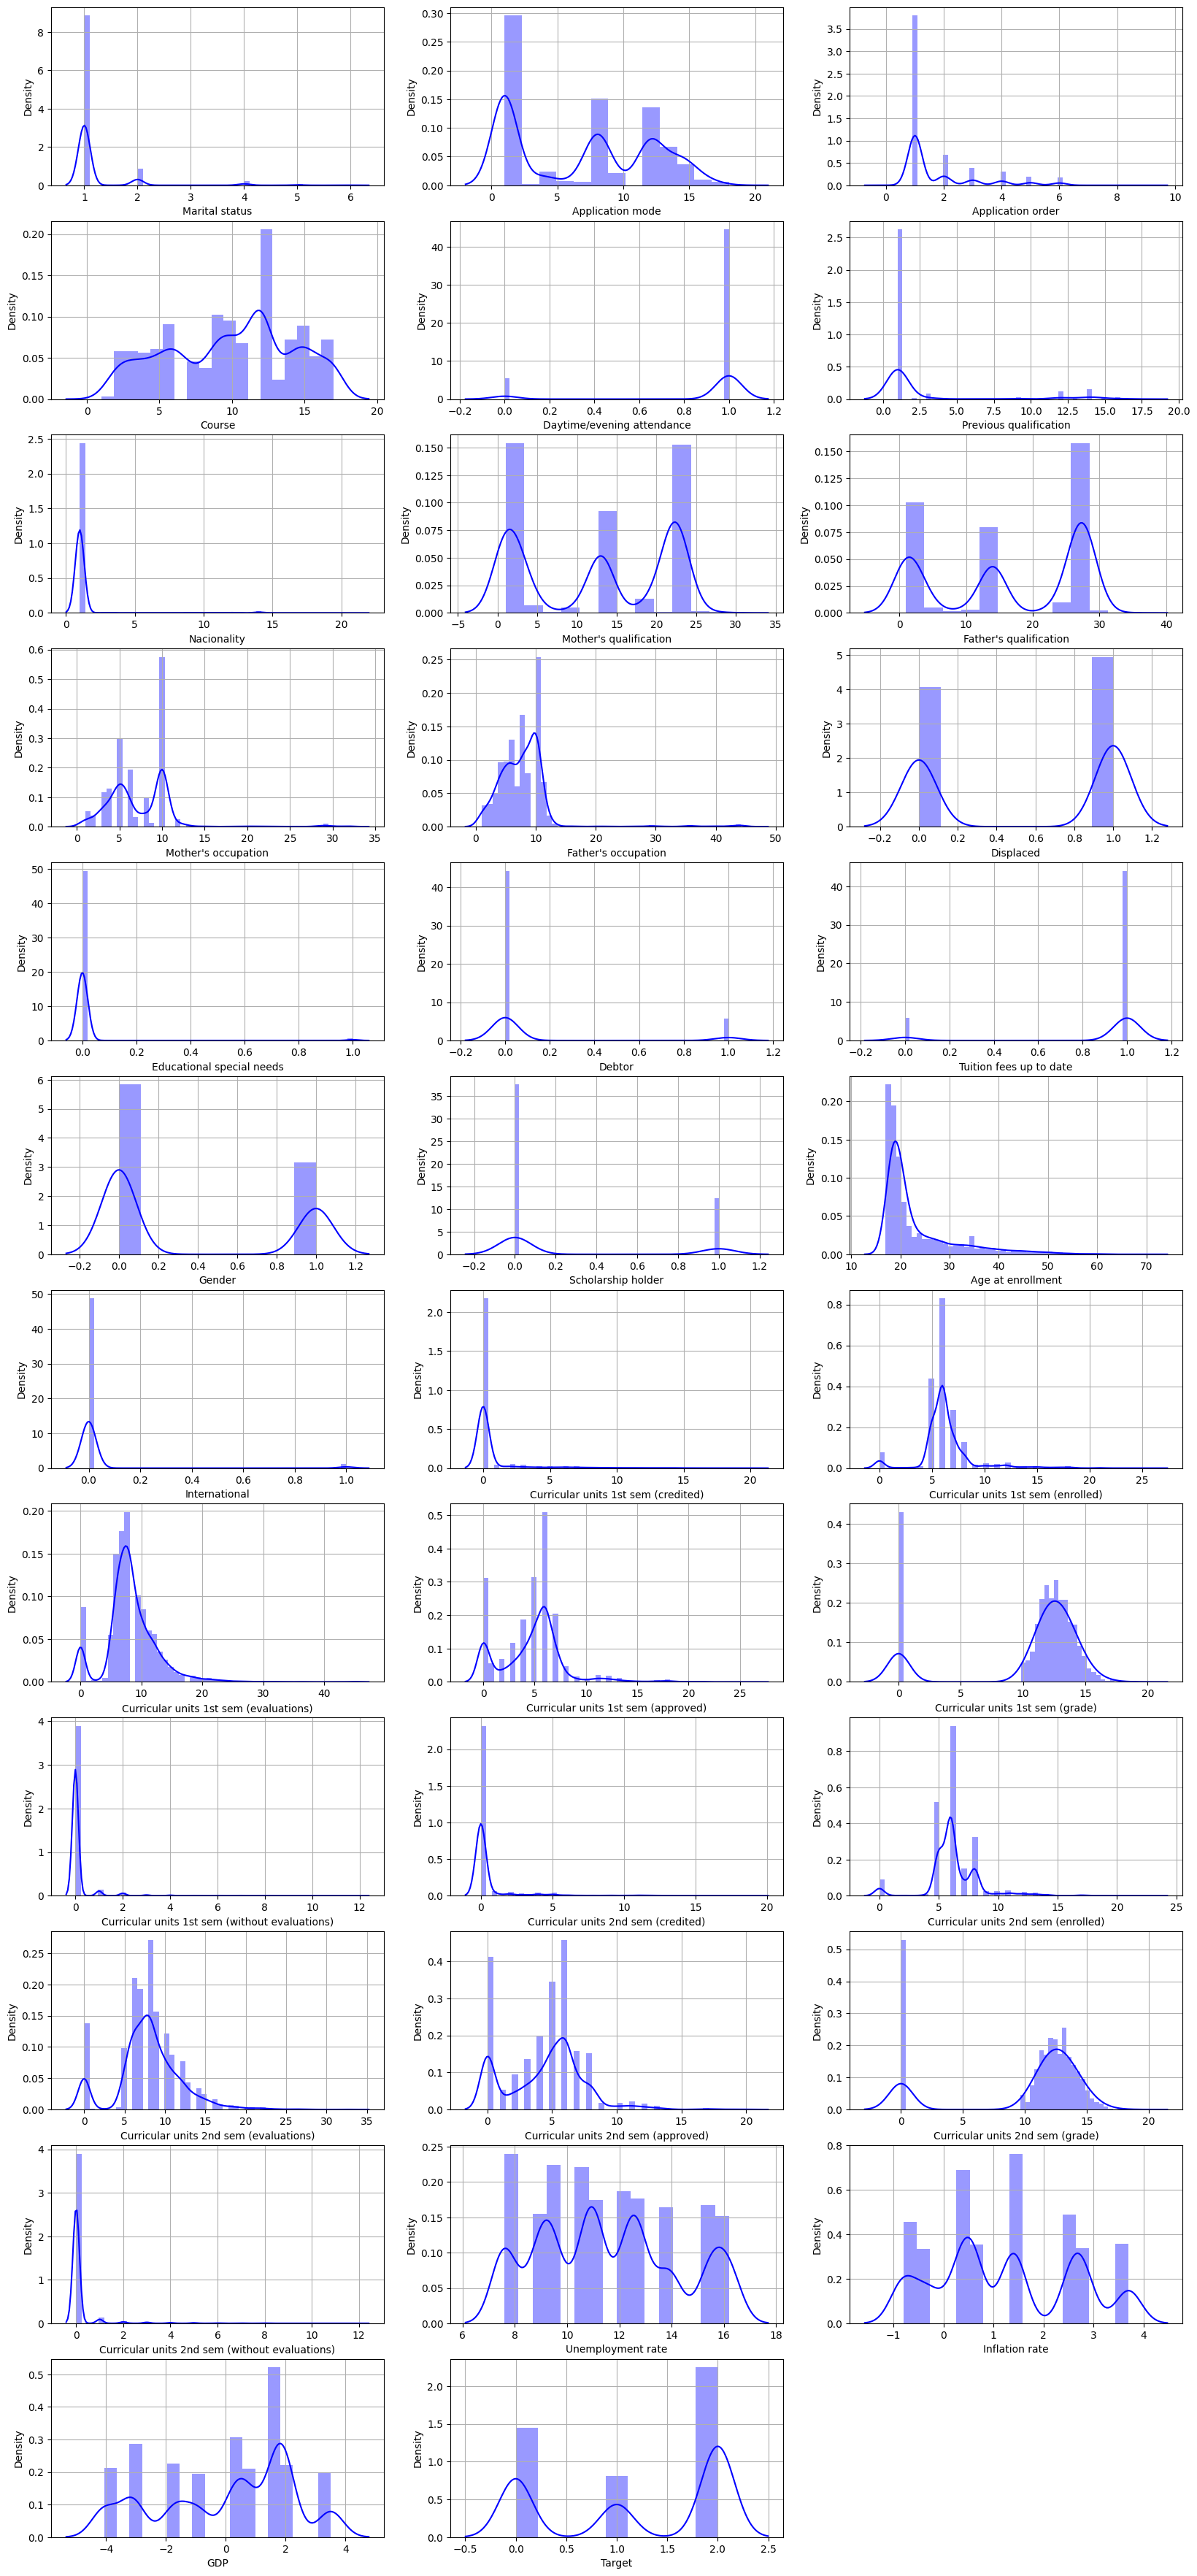

In [24]:
plt.figure(figsize=(20, 45))

for i in range(0, 35):
    plt.subplot(12,3,i+1)
    sns.distplot(df.iloc[:, i], color='blue')
    plt.grid()

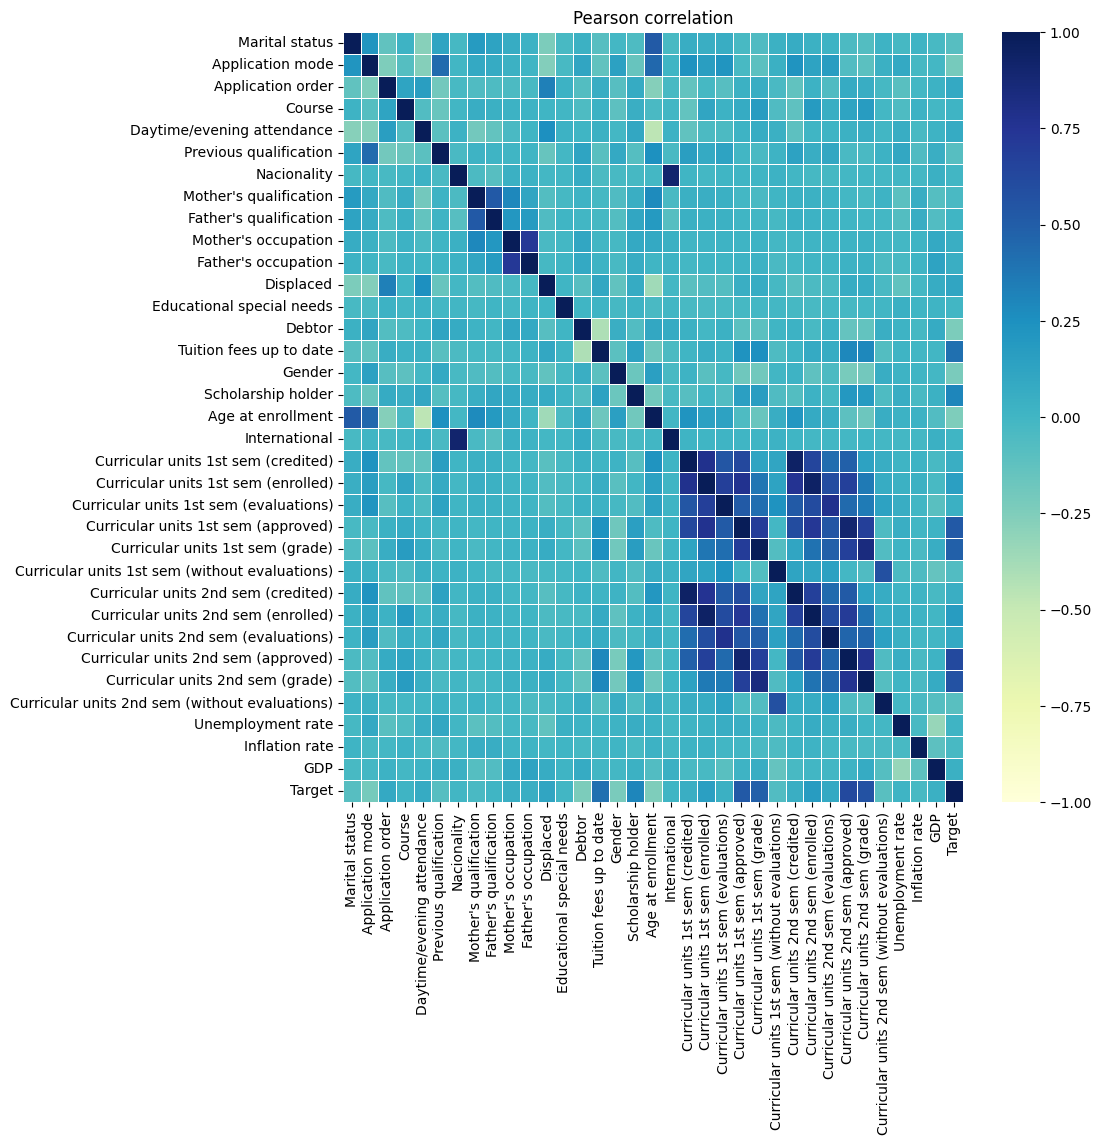

In [25]:
#feature selection
corr_matrix = df.corr(method="pearson")
plt.figure(figsize=(10, 10)) 
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=False, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson correlation")
plt.show()

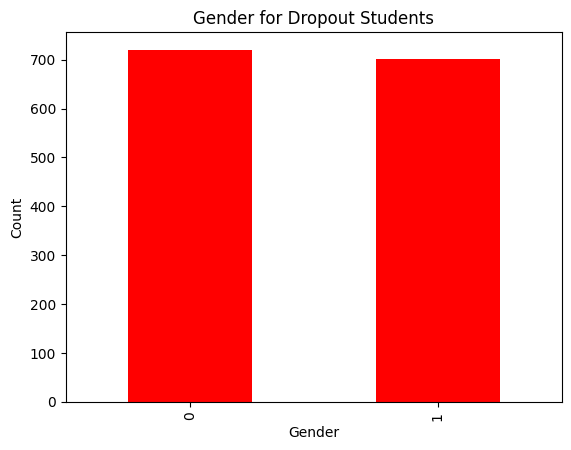

In [26]:
# Filter the data
filtered_data = new_data[new_data['Target'] == 0]

# Sort the filtered data by 'Curricular units 2nd sem (approved)' in descending order
sorted_data = filtered_data.sort_values(by='Gender', ascending=False)

# Count the occurrences of each value in the sorted column
value_counts = sorted_data['Gender'].value_counts()

# Create a bar chart
value_counts.plot(kind='bar', color='red')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender for Dropout Students')
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

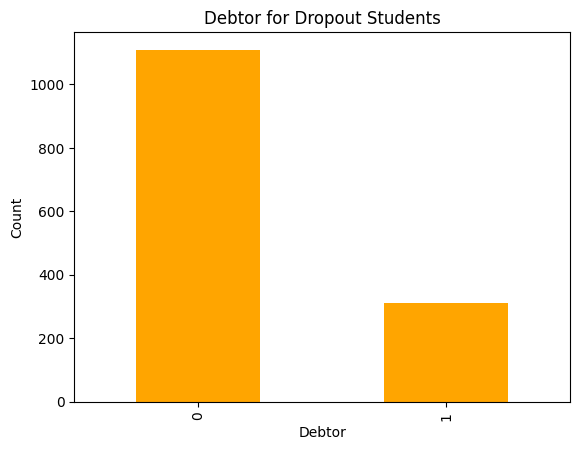

In [27]:
# Filter the data
filtered_data = new_data[new_data['Target'] == 0]

# Sort the filtered data by 'Curricular units 2nd sem (approved)' in descending order
sorted_data = filtered_data.sort_values(by='Debtor', ascending=False)

# Count the occurrences of each value in the sorted column
value_counts = sorted_data['Debtor'].value_counts()

# Create a bar chart
value_counts.plot(kind='bar', color='orange')
plt.xlabel('Debtor')
plt.ylabel('Count')
plt.title('Debtor for Dropout Students')
plt.xticks

<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

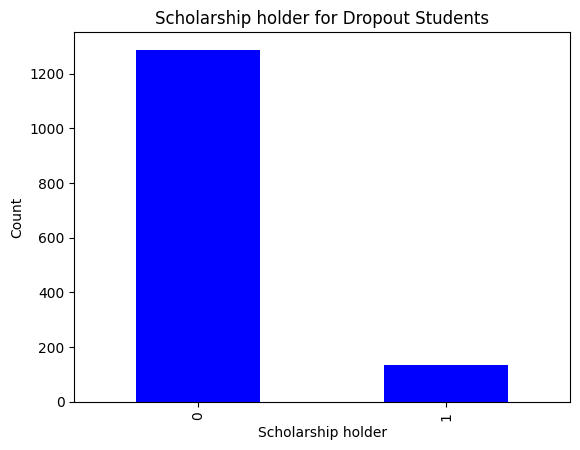

In [28]:
# Filter the data
filtered_data = new_data[new_data['Target'] == 0]

# Sort the filtered data by 'Curricular units 2nd sem (approved)' in descending order
sorted_data = filtered_data.sort_values(by='Scholarship holder', ascending=False)

# Count the occurrences of each value in the sorted column
value_counts = sorted_data['Scholarship holder'].value_counts()

# Create a bar chart
value_counts.plot(kind='bar', color='blue')
plt.xlabel('Scholarship holder')
plt.ylabel('Count')
plt.title('Scholarship holder for Dropout Students')
plt.xticks

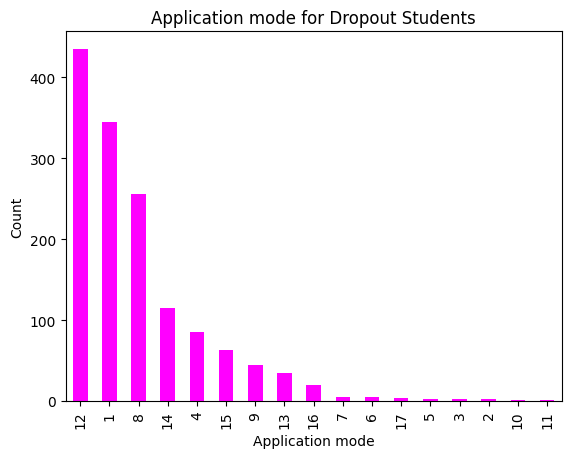

In [29]:
# Filter the data
filtered_data = new_data[new_data['Target'] == 0]

# Sort the filtered data by 'Curricular units 2nd sem (approved)' in descending order
sorted_data = filtered_data.sort_values(by='Application mode', ascending=False)

# Count the occurrences of each value in the sorted column
value_counts = sorted_data['Application mode'].value_counts()

# Create a bar chart
value_counts.plot(kind='bar', color='magenta')
plt.xlabel('Application mode')
plt.ylabel('Count')
plt.title('Application mode for Dropout Students')
plt.xticks(rotation=90)
plt.show()

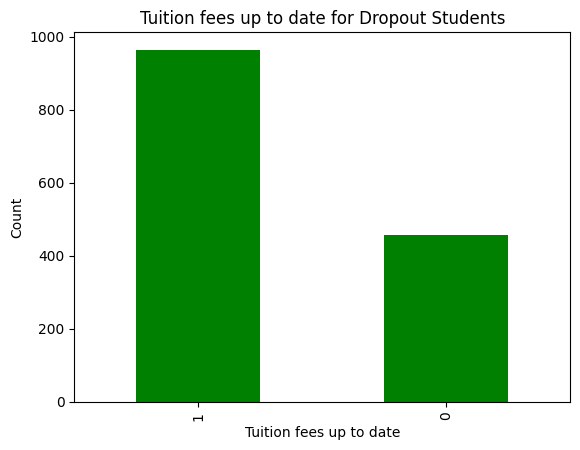

In [30]:
# Filter the data
filtered_data = new_data[new_data['Target'] == 0]

# Sort the filtered data by 'Curricular units 2nd sem (approved)' in descending order
sorted_data = filtered_data.sort_values(by='Tuition fees up to date', ascending=False)

# Count the occurrences of each value in the sorted column
value_counts = sorted_data['Tuition fees up to date'].value_counts()

# Create a bar chart
value_counts.plot(kind='bar', color='green')
plt.xlabel('Tuition fees up to date')
plt.ylabel('Count')
plt.title('Tuition fees up to date for Dropout Students')
plt.xticks(rotation=90)
plt.show()

In [31]:
["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]
corr_matrix["Target"]

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

## **Assertion**

### As we are predicting whether a student will dropout or not so, the number of "Enrolled" student is irrelevant. We only need to know whether a student graduated or dropedout. So, we are dropping the "Enrolled" values and going forward with "Graduate" & "Dropout" values.

In [32]:
df.drop(df[df['Target'] == 1].index, inplace = True)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [33]:
df['Dropout'] = df['Target'].apply(lambda x: 1 if x==0 else 0)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,1
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,6,8,5,12.666667,0,15.5,2.8,-4.06,2,0
4420,1,1,2,15,1,1,19,1,1,10,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,1
4421,1,1,1,12,1,1,1,22,27,10,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,1
4422,1,1,1,9,1,1,1,22,27,8,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,0


/var/folders/9c/vf9yy0kx1wqfcn4frtpw6jhh0000gn/T/ipykernel_1397/692082763.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Dropout'], color = "red")


<Axes: xlabel='Dropout', ylabel='Density'>

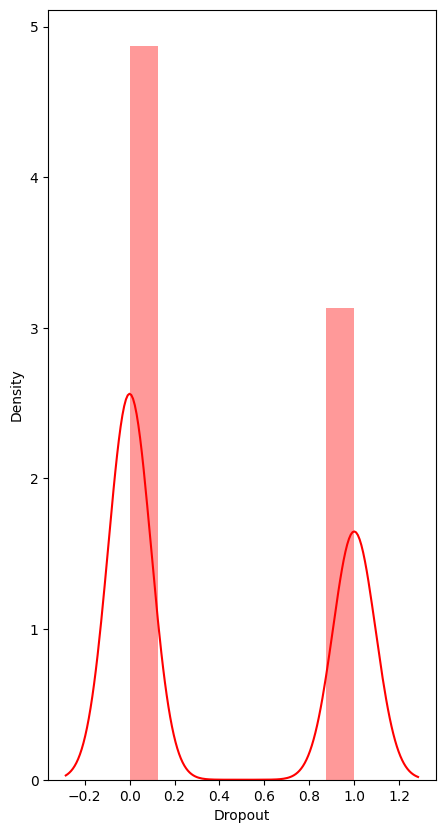

In [34]:
plt.figure(figsize=(5, 10))
sns.distplot(df['Dropout'], color = "red")

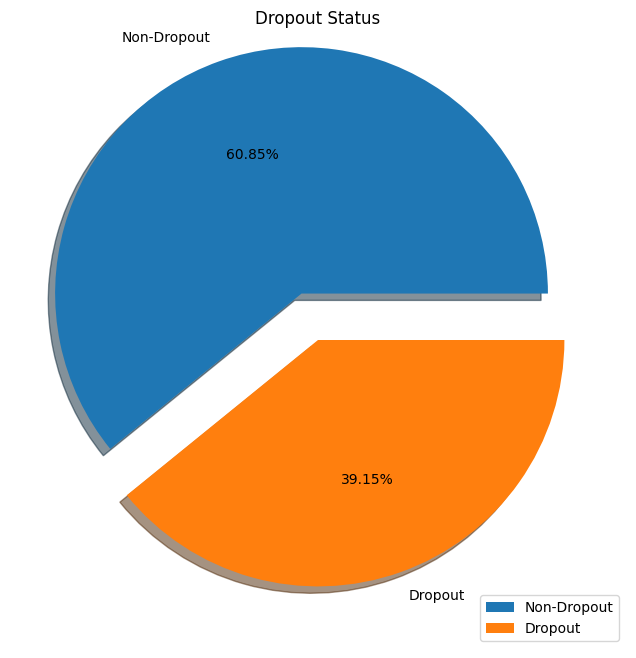

In [35]:
plt.figure(figsize=(8, 8))
plt.title("Dropout Status")
plt.pie(df['Dropout'].value_counts(),  labels = ['Non-Dropout', 'Dropout'], explode = (0.2, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

# Standard Scaling the Data

In [36]:
x = df.iloc[:, :36].values
#x = df[["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]].values
print(x)
x = StandardScaler().fit_transform(x)
x

[[ 1.    8.    5.   ...  1.74  0.    1.  ]
 [ 1.    6.    1.   ...  0.79  2.    0.  ]
 [ 1.    1.    5.   ...  1.74  0.    1.  ]
 ...
 [ 1.    1.    1.   ...  0.79  0.    1.  ]
 [ 1.    1.    1.   ... -3.12  2.    0.  ]
 [ 1.    5.    1.   ... -1.7   2.    0.  ]]


array([[-0.30068558,  0.22650506,  2.4368225 , ...,  0.77411864,
        -1.24681156,  1.24681156],
       [-0.30068558, -0.15423741, -0.56247077, ...,  0.35370412,
         0.80204582, -0.80204582],
       [-0.30068558, -1.10609361,  2.4368225 , ...,  0.77411864,
        -1.24681156,  1.24681156],
       ...,
       [-0.30068558, -1.10609361, -0.56247077, ...,  0.35370412,
        -1.24681156,  1.24681156],
       [-0.30068558, -1.10609361, -0.56247077, ..., -1.37663355,
         0.80204582, -0.80204582],
       [-0.30068558, -0.34460865, -0.56247077, ..., -0.74822447,
         0.80204582, -0.80204582]])

In [37]:
y = df['Dropout'].values
y

array([1, 0, 1, ..., 1, 0, 0])

# Train & Test Splitting the Data

In [38]:
features = ['Marital status', 'Application mode', 'Application order', 'Course', 'Previous qualification','Mother\'s occupation','Father\'s occupation', 'Displaced','Tuition fees up to date','Scholarship holder','Age at enrollment']
X = new_data[features]
y = new_data.Target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Function to Measure Performance

In [39]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

# Gaussian Naive Bayes

In [40]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [41]:
y_pred_nb = model_nb.predict(x_test)

[[216   0   0]
 [  0  30   0]
 [  0   0 639]]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

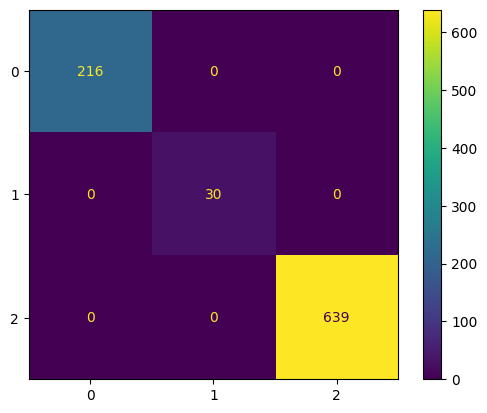

In [100]:
#perform(y_pred_nb)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Assuming 'cm' is the confusion matrix
cm = confusion_matrix(y_pred_nb, y_pred_nb)
print(cm)
display_labels = ['Non-Dropout', 'Dropout']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
cm_display.plot()


# Logistic Regression

In [44]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.5898305084745763
Recall :  0.5898305084745763
Accuracy :  0.5898305084745763
F1 Score :  0.5898305084745763

 [[121   2 151]
 [ 29   4 134]
 [ 43   4 397]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.63      0.44      0.52       274
           1       0.40      0.02      0.05       167
           2       0.58      0.89      0.71       444

    accuracy                           0.59       885
   macro avg       0.54      0.45      0.42       885
weighted avg       0.56      0.59      0.52       885

******************************************************



ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

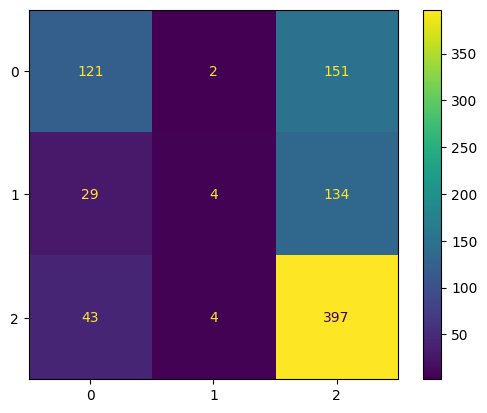

In [46]:
perform(y_pred_lr)

# Random Forest

In [47]:
model_rf = RandomForestClassifier(n_estimators=500,criterion='entropy')
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [48]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.6090395480225989
Recall :  0.6090395480225989
Accuracy :  0.6090395480225989
F1 Score :  0.6090395480225989

 [[150  23 101]
 [ 46  32  89]
 [ 57  30 357]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       274
           1       0.38      0.19      0.25       167
           2       0.65      0.80      0.72       444

    accuracy                           0.61       885
   macro avg       0.54      0.51      0.51       885
weighted avg       0.58      0.61      0.59       885

******************************************************



ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

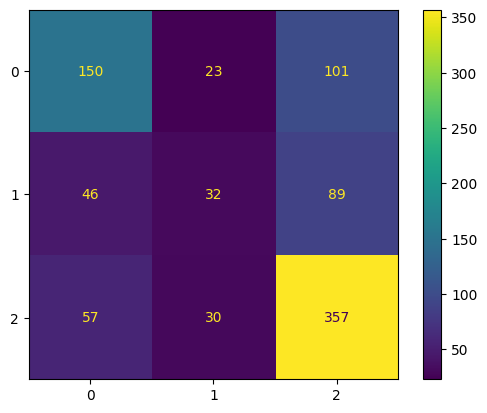

In [49]:
perform(y_pred_rf)

# Support Vector Classifier

In [50]:
model_svc = SVC(C=0.1,kernel='linear')
model_svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [51]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.5807909604519774
Recall :  0.5807909604519774
Accuracy :  0.5807909604519774
F1 Score :  0.5807909604519774

 [[ 76   0 198]
 [ 12   0 155]
 [  6   0 438]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.81      0.28      0.41       274
           1       0.00      0.00      0.00       167
           2       0.55      0.99      0.71       444

    accuracy                           0.58       885
   macro avg       0.45      0.42      0.37       885
weighted avg       0.53      0.58      0.48       885

******************************************************



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

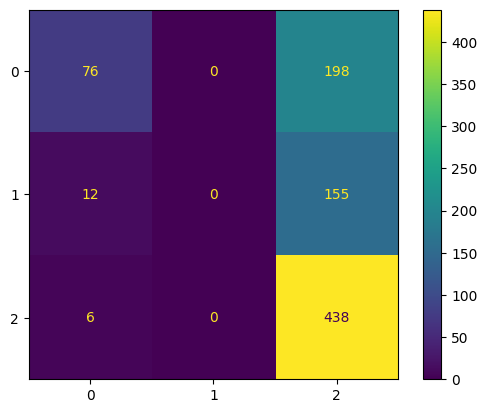

In [52]:
perform(y_pred_svc)

# Perceptron

In [53]:
model_mlp = Perceptron(alpha=0.001,l1_ratio=0.5,max_iter=100)
model_mlp.fit(x_train, y_train)

Perceptron(alpha=0.001, l1_ratio=0.5, max_iter=100)

In [54]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  0.5785310734463277
Recall :  0.5785310734463277
Accuracy :  0.5785310734463277
F1 Score :  0.5785310734463277

 [[ 81   0 193]
 [ 17   0 150]
 [ 13   0 431]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.73      0.30      0.42       274
           1       0.00      0.00      0.00       167
           2       0.56      0.97      0.71       444

    accuracy                           0.58       885
   macro avg       0.43      0.42      0.38       885
weighted avg       0.51      0.58      0.49       885

******************************************************



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

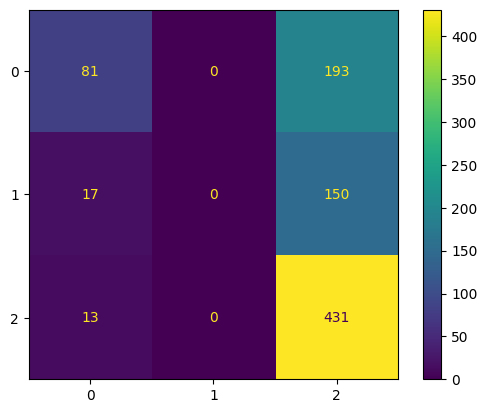

In [55]:
perform(y_pred_mlp)

# KNN Classifier

In [64]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred_i)
    error.append(accuracy)

Text(0, 0.5, 'Accuracy')

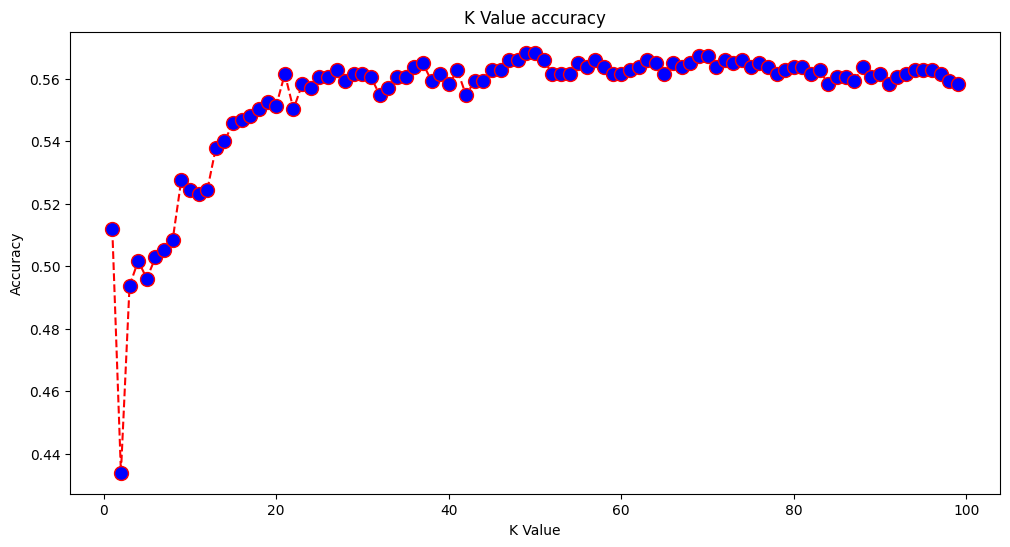

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [66]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
y_pred_knn = model_knn.predict(x_test)

Precision :  0.4937853107344633
Recall :  0.4937853107344633
Accuracy :  0.4937853107344633
F1 Score :  0.4937853107344633

 [[138  22 114]
 [ 65  19  83]
 [127  37 280]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.42      0.50      0.46       274
           1       0.24      0.11      0.16       167
           2       0.59      0.63      0.61       444

    accuracy                           0.49       885
   macro avg       0.42      0.42      0.41       885
weighted avg       0.47      0.49      0.48       885

******************************************************



ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

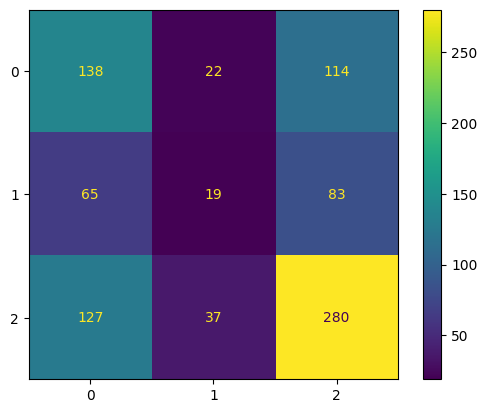

In [ ]:
perform(y_pred_knn)

# Comparison

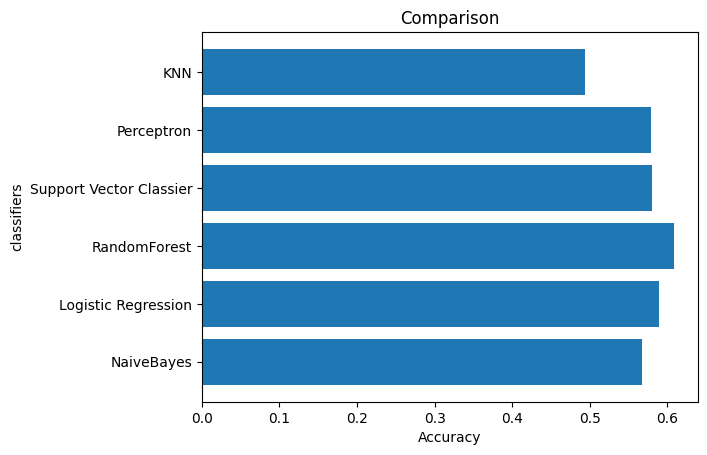

In [68]:
pred=[y_pred_nb,y_pred_lr,y_pred_rf,y_pred_svc,y_pred_mlp,y_pred_knn]
acc=[]
classifiers=["NaiveBayes","Logistic Regression","RandomForest","Support Vector Classier","Perceptron","KNN"]
for i in pred:
    temp=accuracy_score(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('Accuracy')
plt.title('Comparison')
plt.show()

    

In [81]:
X2 = df.drop('Target', axis=1)
y2 = df['Target']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
scaler = preprocessing.MinMaxScaler()
X2 = scaler.fit_transform(X)

In [83]:
# Create a function to build our models
def models(X_train2, y_train2):

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train2, y_train2)

    # Decision Trees
    dt = DecisionTreeClassifier()
    dt.fit(X_train2,y_train2)

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(X_train2, y_train2)

    return lr,dt,knn

lr,dt,knn = models(X_train2, y_train2)

# prediction
y_pred_lr = lr.predict(X_test2)
y_pred_knn = knn.predict(X_test2)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
def evaluate_models(X_test2, y_test2, models):
    results = [] # A list to store the evaluation results of each model
    for name, model in models.items():

        # make prediction on the test data
        y_pred = model.predict(X_test2)

        # calculate the evaluation metric scores
        accuracy = accuracy_score(y_test2, y_pred)
        precision = precision_score(y_test2, y_pred, pos_label=0)
        recall = recall_score(y_test2, y_pred, pos_label=0 )

        # store the results in a list of dictionary
        results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
    
    # Convert the lit of dictionaries to a pandas DataFrame
    return pd.DataFrame(results)

# define a dict containing the trained models for each algorithm
models = {'Logistic Regression': lr,'Decision Tree': dt, 'KNN': knn}

# call the evaluate models function on the test data and models dictionary
results_df = evaluate_models(X_test2, y_test2, models)

print(results_df)

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  1.000000   1.000000  1.000000
1        Decision Tree  1.000000   1.000000  1.000000
2                  KNN  0.829201   0.876847  0.642599


In [93]:
y_test2.describe()

count    726.000000
mean       1.236915
std        0.972200
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Target, dtype: float64